In [1]:
import os
import pandas as pd
# a library for manipulating unstructed data: images
from PIL import Image
import numpy as np
# load all images in a directory
from os import listdir
from matplotlib import image
from matplotlib import pyplot as plt

# a library for manipulating unstructed data: images
import cv2

## Train data

In [2]:
# create a list of the all the horse and human images in the train dataset
# create a list of all the corresponding image filenames

train_data = []
file_name = []

DATADIR = "./horse-or-human"
CATEGORIES = ["horses","humans"]

# resize all images so there is an appropriate number of pixel features
IMG_SIZE = 10

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for filename in listdir(path):
        img_data = cv2.imread(os.path.join(path,filename),0)    
        img = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE)).flatten()
        train_data.append(img)
        file_name.append(filename)
    
len(train_data)

1027

In [3]:
# create a list of all the images' classes: horse or human

classification = []
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for filename in listdir(path):
        if category == "horses":
            classification.append("horse")
        else:
            classification.append("human")
            
print(classification)

['horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 

In [4]:
# view list of file names

file_name

['horse43-5.png',
 'horse06-5.png',
 'horse20-6.png',
 'horse04-7.png',
 'horse41-7.png',
 'horse22-4.png',
 'horse19-2.png',
 'horse24-2.png',
 'horse37-8.png',
 'horse02-1.png',
 'horse47-1.png',
 'horse39-7.png',
 'horse26-0.png',
 'horse13-9.png',
 'horse45-3.png',
 'horse45-2.png',
 'horse13-8.png',
 'horse26-1.png',
 'horse39-6.png',
 'horse02-0.png',
 'horse37-9.png',
 'horse47-0.png',
 'horse24-3.png',
 'horse19-3.png',
 'horse22-5.png',
 'horse04-6.png',
 'horse41-6.png',
 'horse20-7.png',
 'horse43-4.png',
 'horse06-4.png',
 'horse20-5.png',
 'horse06-6.png',
 'horse43-6.png',
 'horse08-9.png',
 'horse22-7.png',
 'horse41-4.png',
 'horse04-4.png',
 'horse19-1.png',
 'horse47-2.png',
 'horse02-2.png',
 'horse11-8.png',
 'horse24-1.png',
 'horse39-4.png',
 'horse35-9.png',
 'horse45-0.png',
 'horse26-3.png',
 'horse26-2.png',
 'horse35-8.png',
 'horse45-1.png',
 'horse39-5.png',
 'horse24-0.png',
 'horse11-9.png',
 'horse47-3.png',
 'horse02-3.png',
 'horse19-0.png',
 'horse41-

In [5]:
# create a DataFrame for all the train_data

train_df = pd.DataFrame(data=train_data)

train_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,51,41,65,13,41,50,11,20,110,66,...,144,122,128,123,64,104,131,108,105,125
1,163,162,162,64,162,166,187,189,255,254,...,230,225,229,202,188,98,79,82,111,210
2,142,140,138,137,135,134,134,134,135,135,...,188,186,26,179,47,177,182,184,35,182
3,175,172,169,164,160,156,157,158,159,160,...,208,194,193,179,181,206,181,180,183,190
4,108,110,122,122,117,117,119,130,168,206,...,75,54,44,25,38,64,43,84,47,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,83,69,99,124,86,17,116,218,240,197,...,141,69,21,131,29,59,87,86,18,29
1023,92,154,244,240,27,12,214,204,230,241,...,97,102,118,58,24,79,44,99,40,36
1024,186,195,201,202,195,148,182,170,157,144,...,76,79,61,100,12,24,27,15,89,83
1025,106,118,132,147,163,130,114,202,206,206,...,80,79,65,74,10,20,13,14,12,93


In [6]:
# create the classification feature column

train_df["category"] = classification

In [7]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,category
0,51,41,65,13,41,50,11,20,110,66,...,122,128,123,64,104,131,108,105,125,horse
1,163,162,162,64,162,166,187,189,255,254,...,225,229,202,188,98,79,82,111,210,horse
2,142,140,138,137,135,134,134,134,135,135,...,186,26,179,47,177,182,184,35,182,horse
3,175,172,169,164,160,156,157,158,159,160,...,194,193,179,181,206,181,180,183,190,horse
4,108,110,122,122,117,117,119,130,168,206,...,54,44,25,38,64,43,84,47,49,horse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,83,69,99,124,86,17,116,218,240,197,...,69,21,131,29,59,87,86,18,29,human
1023,92,154,244,240,27,12,214,204,230,241,...,102,118,58,24,79,44,99,40,36,human
1024,186,195,201,202,195,148,182,170,157,144,...,79,61,100,12,24,27,15,89,83,human
1025,106,118,132,147,163,130,114,202,206,206,...,79,65,74,10,20,13,14,12,93,human


In [8]:
# recode into binary

train_df["category"] = train_df["category"].map({"human":1, "horse":0})

In [9]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,category
0,51,41,65,13,41,50,11,20,110,66,...,122,128,123,64,104,131,108,105,125,0
1,163,162,162,64,162,166,187,189,255,254,...,225,229,202,188,98,79,82,111,210,0
2,142,140,138,137,135,134,134,134,135,135,...,186,26,179,47,177,182,184,35,182,0
3,175,172,169,164,160,156,157,158,159,160,...,194,193,179,181,206,181,180,183,190,0
4,108,110,122,122,117,117,119,130,168,206,...,54,44,25,38,64,43,84,47,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,83,69,99,124,86,17,116,218,240,197,...,69,21,131,29,59,87,86,18,29,1
1023,92,154,244,240,27,12,214,204,230,241,...,102,118,58,24,79,44,99,40,36,1
1024,186,195,201,202,195,148,182,170,157,144,...,79,61,100,12,24,27,15,89,83,1
1025,106,118,132,147,163,130,114,202,206,206,...,79,65,74,10,20,13,14,12,93,1


In [10]:
# create a column for the filename

train_df["filename"] = file_name

train_df

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,category,filename
0,51,41,65,13,41,50,11,20,110,66,...,128,123,64,104,131,108,105,125,0,horse43-5.png
1,163,162,162,64,162,166,187,189,255,254,...,229,202,188,98,79,82,111,210,0,horse06-5.png
2,142,140,138,137,135,134,134,134,135,135,...,26,179,47,177,182,184,35,182,0,horse20-6.png
3,175,172,169,164,160,156,157,158,159,160,...,193,179,181,206,181,180,183,190,0,horse04-7.png
4,108,110,122,122,117,117,119,130,168,206,...,44,25,38,64,43,84,47,49,0,horse41-7.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,83,69,99,124,86,17,116,218,240,197,...,21,131,29,59,87,86,18,29,1,human09-13.png
1023,92,154,244,240,27,12,214,204,230,241,...,118,58,24,79,44,99,40,36,1,human09-07.png
1024,186,195,201,202,195,148,182,170,157,144,...,61,100,12,24,27,15,89,83,1,human17-13.png
1025,106,118,132,147,163,130,114,202,206,206,...,65,74,10,20,13,14,12,93,1,human17-07.png


In [11]:
# view datatypes for each feature

train_df.dtypes

0            int64
1            int64
2            int64
3            int64
4            int64
             ...  
97           int64
98           int64
99           int64
category     int64
filename    object
Length: 102, dtype: object

In [12]:
# print out features and target for the train data

features = train_df.columns[:-2].tolist()

target = "category"

print(features)
print(target)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
category


In [13]:
# rename target for modelling

y_train = train_df[target]

y_train

0       0
1       0
2       0
3       0
4       0
       ..
1022    1
1023    1
1024    1
1025    1
1026    1
Name: category, Length: 1027, dtype: int64

In [14]:
# rename features for modelling

X_train = train_df[features]

X_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,51,41,65,13,41,50,11,20,110,66,...,144,122,128,123,64,104,131,108,105,125
1,163,162,162,64,162,166,187,189,255,254,...,230,225,229,202,188,98,79,82,111,210
2,142,140,138,137,135,134,134,134,135,135,...,188,186,26,179,47,177,182,184,35,182
3,175,172,169,164,160,156,157,158,159,160,...,208,194,193,179,181,206,181,180,183,190
4,108,110,122,122,117,117,119,130,168,206,...,75,54,44,25,38,64,43,84,47,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,83,69,99,124,86,17,116,218,240,197,...,141,69,21,131,29,59,87,86,18,29
1023,92,154,244,240,27,12,214,204,230,241,...,97,102,118,58,24,79,44,99,40,36
1024,186,195,201,202,195,148,182,170,157,144,...,76,79,61,100,12,24,27,15,89,83
1025,106,118,132,147,163,130,114,202,206,206,...,80,79,65,74,10,20,13,14,12,93


## Test data

In [15]:
# create a list of the all the horse and human images in the test dataset
# create a list of all the corresponding image filenames

test_data = []
test_file_names = []
DATADIR_VAL = "./validation-horse-or-human"
CATEGORIES = ["horses","humans"]

IMG_SIZE = 10

for category in CATEGORIES:
    path_val = os.path.join(DATADIR_VAL, category)
    class_num = CATEGORIES.index(category)
    for filename in listdir(path_val):
        img_data = cv2.imread(os.path.join(path_val,filename),0)    
        img = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE)).flatten()
        test_data.append(img)
        test_file_names.append(filename)
    
len(test_data)

256

In [16]:
# view list of test file names

test_file_names

['horse1-204.png',
 'horse2-112.png',
 'horse3-498.png',
 'horse5-032.png',
 'horse5-018.png',
 'horse1-170.png',
 'horse5-192.png',
 'horse1-411.png',
 'horse4-232.png',
 'horse3-070.png',
 'horse1-000.png',
 'horse5-342.png',
 'horse5-550.png',
 'horse4-541.png',
 'horse4-345.png',
 'horse2-314.png',
 'horse5-181.png',
 'horse5-235.png',
 'horse3-099.png',
 'horse4-556.png',
 'horse3-217.png',
 'horse1-298.png',
 'horse2-011.png',
 'horse1-105.png',
 'horse4-530.png',
 'horse6-153.png',
 'horse6-345.png',
 'horse1-264.png',
 'horse6-218.png',
 'horse4-043.png',
 'horse3-198.png',
 'horse2-412.png',
 'horse4-495.png',
 'horse5-123.png',
 'horse3-416.png',
 'horse2-201.png',
 'horse5-519.png',
 'horse1-539.png',
 'horse4-468.png',
 'horse3-171.png',
 'horse1-276.png',
 'horse1-510.png',
 'horse6-544.png',
 'horse5-478.png',
 'horse3-011.png',
 'horse5-083.png',
 'horse2-582.png',
 'horse5-065.png',
 'horse2-596.png',
 'horse1-455.png',
 'horse4-302.png',
 'horse6-004.png',
 'horse3-141

In [17]:
# create a list of all the images' classes: horse or human

test_classification = []
for category in CATEGORIES:
    path_val_name = os.path.join(DATADIR_VAL, category)
    for filename in listdir(path_val_name):
        if category == "horses":
            test_classification.append("horse")
        else:
            test_classification.append("human")
            
print(test_classification)

['horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 'horse', 

In [18]:
# create a DataFrame for all the test_data

test_df = pd.DataFrame(data=test_data)

test_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,255,255,255,255,38,253,255,255,255,255,...,255,255,255,255,255,255,1,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,138,255,255,255,255,...,255,255,255,255,254,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,255,255,255,255,255,255,255,255,255,255,...,233,229,225,221,215,14,253,254,255,255
252,255,255,255,255,255,255,255,255,255,255,...,239,239,238,217,212,220,232,252,254,255
253,255,255,255,255,255,255,255,255,255,255,...,252,251,251,250,250,64,235,254,255,255
254,255,255,255,255,255,76,255,255,255,255,...,229,226,220,213,202,129,250,253,254,254


In [19]:
# create the classification feature column

test_df["category"] = test_classification

test_df["category"]

0      horse
1      horse
2      horse
3      horse
4      horse
       ...  
251    human
252    human
253    human
254    human
255    human
Name: category, Length: 256, dtype: object

In [20]:
# recode into binary

test_df["category"] = test_df["category"].map({"human":1, "horse":0})

test_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,category
0,255,255,255,255,38,253,255,255,255,255,...,255,255,255,255,255,1,255,255,255,0
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
2,255,255,255,255,255,138,255,255,255,255,...,255,255,255,254,255,255,255,255,255,0
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,255,255,255,255,255,255,255,255,255,255,...,229,225,221,215,14,253,254,255,255,1
252,255,255,255,255,255,255,255,255,255,255,...,239,238,217,212,220,232,252,254,255,1
253,255,255,255,255,255,255,255,255,255,255,...,251,251,250,250,64,235,254,255,255,1
254,255,255,255,255,255,76,255,255,255,255,...,226,220,213,202,129,250,253,254,254,1


In [21]:
# create a column for the filename

test_df["filename"] = test_file_names

test_df

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,category,filename
0,255,255,255,255,38,253,255,255,255,255,...,255,255,255,255,1,255,255,255,0,horse1-204.png
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,0,horse2-112.png
2,255,255,255,255,255,138,255,255,255,255,...,255,255,254,255,255,255,255,255,0,horse3-498.png
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,0,horse5-032.png
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,0,horse5-018.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,255,255,255,255,255,255,255,255,255,255,...,225,221,215,14,253,254,255,255,1,valhuman01-21.png
252,255,255,255,255,255,255,255,255,255,255,...,238,217,212,220,232,252,254,255,1,valhuman04-05.png
253,255,255,255,255,255,255,255,255,255,255,...,251,250,250,64,235,254,255,255,1,valhuman04-11.png
254,255,255,255,255,255,76,255,255,255,255,...,220,213,202,129,250,253,254,254,1,valhuman03-18.png


In [22]:
# print out features and target for the test data

test_features = test_df.columns[:-2].tolist()

test_target = "category"

In [23]:
# rename features for modelling

X_test = test_df[test_features]

X_test

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,255,255,255,255,38,253,255,255,255,255,...,255,255,255,255,255,255,1,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,138,255,255,255,255,...,255,255,255,255,254,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,255,255,255,255,255,255,255,255,255,255,...,233,229,225,221,215,14,253,254,255,255
252,255,255,255,255,255,255,255,255,255,255,...,239,239,238,217,212,220,232,252,254,255
253,255,255,255,255,255,255,255,255,255,255,...,252,251,251,250,250,64,235,254,255,255
254,255,255,255,255,255,76,255,255,255,255,...,229,226,220,213,202,129,250,253,254,254


In [24]:
# rename target for modelling

y_test = test_df[test_target]

y_test

0      0
1      0
2      0
3      0
4      0
      ..
251    1
252    1
253    1
254    1
255    1
Name: category, Length: 256, dtype: int64

In [25]:
y_train.shape

(1027,)

In [26]:
y_test.shape

(256,)

## SVM

In [27]:
from sklearn import svm

clr = svm.SVC(probability=True)

In [28]:
clr.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [29]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,51,41,65,13,41,50,11,20,110,66,...,144,122,128,123,64,104,131,108,105,125
1,163,162,162,64,162,166,187,189,255,254,...,230,225,229,202,188,98,79,82,111,210
2,142,140,138,137,135,134,134,134,135,135,...,188,186,26,179,47,177,182,184,35,182
3,175,172,169,164,160,156,157,158,159,160,...,208,194,193,179,181,206,181,180,183,190
4,108,110,122,122,117,117,119,130,168,206,...,75,54,44,25,38,64,43,84,47,49


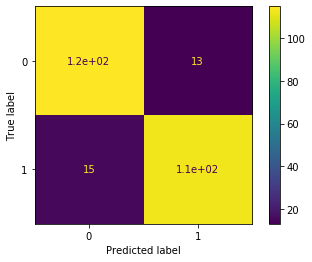

In [30]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clr, X_test, y_test) 
plt.show()  

In [31]:
actual = y_test

In [32]:
actual

0      0
1      0
2      0
3      0
4      0
      ..
251    1
252    1
253    1
254    1
255    1
Name: category, Length: 256, dtype: int64

In [33]:
from sklearn import metrics

predicted = clr.predict(X_test)

actual = y_test

metrics.accuracy_score(predicted, actual)

0.890625

In [34]:
evaluate = pd.DataFrame(data=actual)

In [35]:
evaluate["predicted"] = predicted
evaluate["filename"] = test_file_names

evaluate["filename"]

0         horse1-204.png
1         horse2-112.png
2         horse3-498.png
3         horse5-032.png
4         horse5-018.png
             ...        
251    valhuman01-21.png
252    valhuman04-05.png
253    valhuman04-11.png
254    valhuman03-18.png
255    valhuman03-24.png
Name: filename, Length: 256, dtype: object

In [36]:
evaluate[evaluate["predicted"] != evaluate["category"]]

,category,predicted,filename
2,0,1,horse3-498.png
5,0,1,horse1-170.png
31,0,1,horse2-412.png
35,0,1,horse2-201.png
46,0,1,horse2-582.png
48,0,1,horse2-596.png
74,0,1,horse4-503.png
77,0,1,horse4-501.png
85,0,1,horse6-161.png
89,0,1,horse3-484.png


## Incorrect predictions

float32
(300, 300, 4)


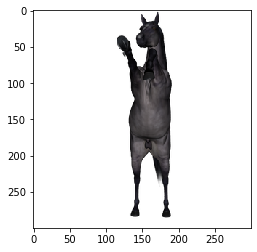

In [37]:
# load image as pixel array
data = image.imread('./validation-horse-or-human/horses/horse3-498.png')

# summarize shape of the pixel array
print(data.dtype)
print(data.shape)

# display the array of pixels as an image
plt.imshow(data)
plt.show()

In [38]:
# create a list of filenames for all images predicted incorrectly

wrong_preds = evaluate[evaluate["predicted"] != evaluate["category"]]
wrong_preds_filenames = []
for filename in wrong_preds["filename"]:
    wrong_preds_filenames.append(filename)

wrong_preds_filenames

['horse3-498.png',
 'horse1-170.png',
 'horse2-412.png',
 'horse2-201.png',
 'horse2-582.png',
 'horse2-596.png',
 'horse4-503.png',
 'horse4-501.png',
 'horse6-161.png',
 'horse3-484.png',
 'horse1-554.png',
 'horse3-521.png',
 'horse4-548.png',
 'valhuman04-08.png',
 'valhuman01-11.png',
 'valhuman04-09.png',
 'valhuman03-05.png',
 'valhuman05-16.png',
 'valhuman05-14.png',
 'valhuman05-15.png',
 'valhuman02-19.png',
 'valhuman05-12.png',
 'valhuman02-17.png',
 'valhuman01-24.png',
 'valhuman04-16.png',
 'valhuman03-23.png',
 'valhuman01-23.png',
 'valhuman03-24.png']

PREDICTED AS HUMAN: horse3-498.png


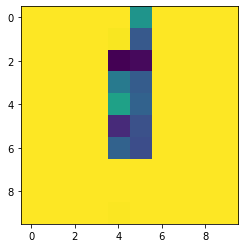

PREDICTED AS HUMAN: horse1-170.png


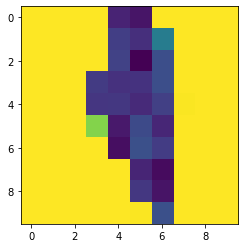

PREDICTED AS HUMAN: horse2-412.png


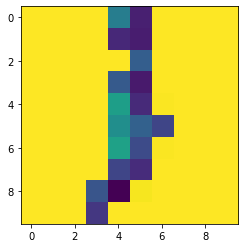

PREDICTED AS HUMAN: horse2-201.png


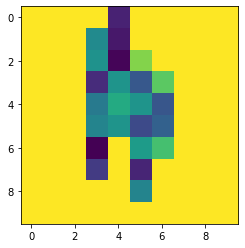

PREDICTED AS HUMAN: horse2-582.png


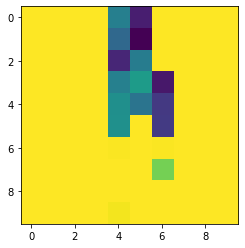

PREDICTED AS HUMAN: horse2-596.png


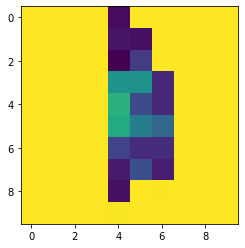

PREDICTED AS HUMAN: horse4-503.png


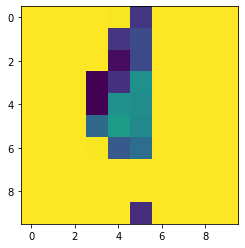

PREDICTED AS HUMAN: horse4-501.png


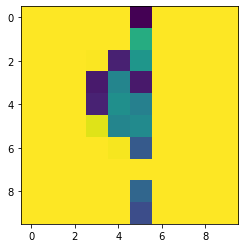

PREDICTED AS HUMAN: horse6-161.png


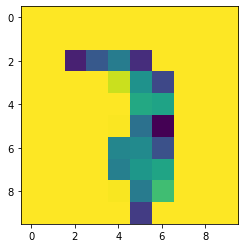

PREDICTED AS HUMAN: horse3-484.png


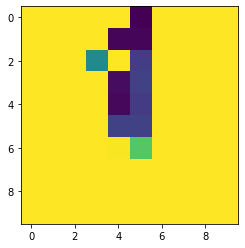

PREDICTED AS HUMAN: horse1-554.png


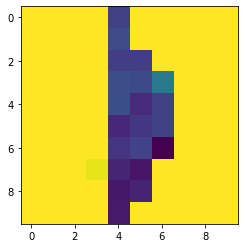

PREDICTED AS HUMAN: horse3-521.png


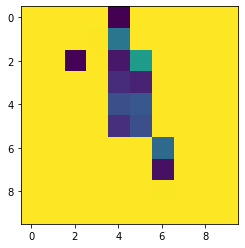

In [43]:
# show all horse images predicted as human

DATADIR_VAL_HORSES = "./validation-horse-or-human/horses"
IMG_SIZE

for filename in wrong_preds_filenames[0:12]:
    data = cv2.imread(os.path.join(DATADIR_VAL_HORSES,filename),0)  
    resized_img = cv2.resize(data, (IMG_SIZE, IMG_SIZE))
    print("PREDICTED AS HUMAN:", filename)
    plt.imshow(resized_img)
    plt.show()

PREDICTED AS HORSE: valhuman04-08.png


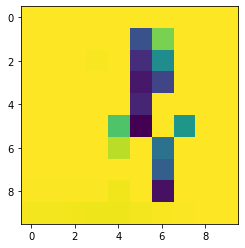

PREDICTED AS HORSE: valhuman01-11.png


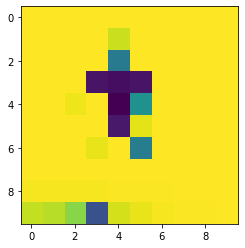

PREDICTED AS HORSE: valhuman04-09.png


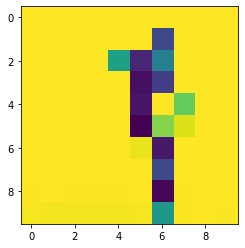

PREDICTED AS HORSE: valhuman03-05.png


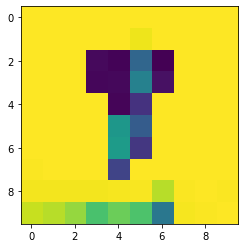

PREDICTED AS HORSE: valhuman05-16.png


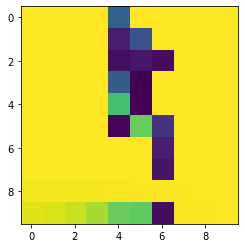

PREDICTED AS HORSE: valhuman05-14.png


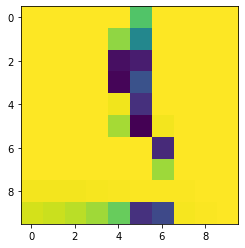

PREDICTED AS HORSE: valhuman05-15.png


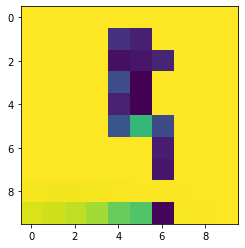

PREDICTED AS HORSE: valhuman02-19.png


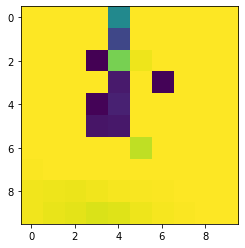

PREDICTED AS HORSE: valhuman05-12.png


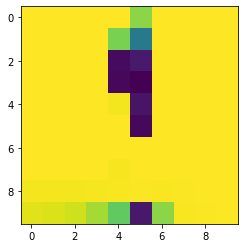

PREDICTED AS HORSE: valhuman02-17.png


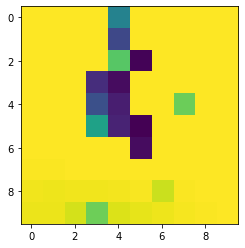

PREDICTED AS HORSE: valhuman01-24.png


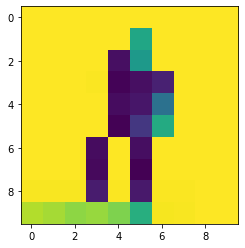

PREDICTED AS HORSE: valhuman04-16.png


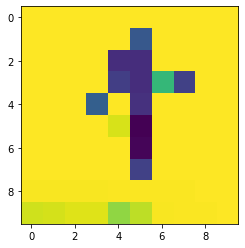

PREDICTED AS HORSE: valhuman03-23.png


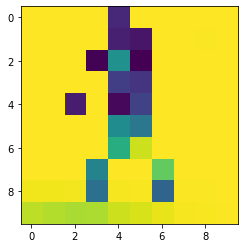

PREDICTED AS HORSE: valhuman01-23.png


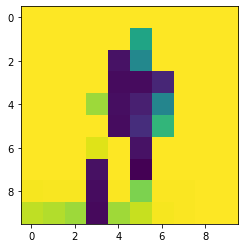

PREDICTED AS HORSE: valhuman03-24.png


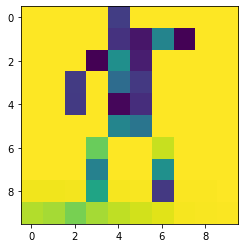

In [42]:
# show all human images predicted as horse

DATADIR_VAL_HUMANS = "./validation-horse-or-human/humans"
IMG_SIZE = 10

for filename in wrong_preds_filenames[13:28]:
    data = cv2.imread(os.path.join(DATADIR_VAL_HUMANS,filename),0)
    resized_img = cv2.resize(data, (IMG_SIZE, IMG_SIZE))
    print("PREDICTED AS HORSE:", filename)
    plt.imshow(resized_img)
    plt.show()

## Classification report

In [41]:
print(metrics.classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       128
           1       0.90      0.88      0.89       128

    accuracy                           0.89       256
   macro avg       0.89      0.89      0.89       256
weighted avg       0.89      0.89      0.89       256

